In [209]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#CARGAR LAS BASES DE DATOS
#os.chdir('/Users/trinimoran/Documents/Ciencia de Datos/CC408-T13/TP3/data')
os.chdir('C:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP3')

# PARTE 1 

PUNTO 2:

In [210]:
#Primero leemos las bases de datos
eph_04 = pd.read_excel('usu_individual_T124.xlsx')
eph_24 = pd.read_stata('Individual_t104.dta')
eph_04
eph_24

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [211]:
# Cambiamos los nombres de las columnas a mayúsculas para que queden iguales y poder trabajar después con ambos DataFrame juntos
eph_04.columns = eph_04.columns.str.upper()
eph_24.columns = eph_24.columns.str.upper()



2 A) Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base

In [212]:
#Como ambos DataFrame tiene diferente codificación, los limpiamos por separado según las categorías correspondientes
# Filtramos para CABA (32) y GBA (33) en 2004
eph_04_cleaned = eph_04.drop(eph_04[~eph_04['AGLOMERADO'].isin([32, 33])].index)

# Filtramos para CABA y GBA en 2024 utilizando nombres de aglomerados
eph_24_cleaned = eph_24.drop(eph_24[~eph_24['AGLOMERADO'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].index)

#Esto es para comprobar que quedan datos de ambos años después de la limpieza
print("Datos 2004 después de filtrar:", eph_04_cleaned.shape[0])
print("Datos 2024 después de filtrar:", eph_24_cleaned.shape[0])

# Concatenamos los DataFrames ya filtrados
eph_combined = pd.concat([eph_04_cleaned, eph_24_cleaned], ignore_index=True)

# Vemos datos relevantes del nuevo DataFrame
print("Cantidad de filas en eph_combined después de concatenar:", eph_combined.shape[0])
print("Primeras filas de eph_combined:\n", eph_combined.head())

# Visualizamos la nueva base 
eph_combined

Datos 2004 después de filtrar: 7051
Datos 2024 después de filtrar: 7647
Cantidad de filas en eph_combined después de concatenar: 14698
Primeras filas de eph_combined:
                           CODUSU    ANO4 TRIMESTRE  NRO_HOGAR COMPONENTE H15  \
0  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          1   1   
1  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          2   1   
2  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          3   1   
3  TQSMNORWVHLLKQCDEIJAH00856914  2024.0         1        1.0          1   1   
4  TQRMNOPQQHLOLRCDEIJAH00855133  2024.0         1        1.0          1   1   

  REGION MAS_500 AGLOMERADO  PONDERA  ... IDECCFR RDECCFR GDECCFR PDECCFR  \
0      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
1      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
2      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
3      1       S         33   2368.0  ...  

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
1,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,2,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,3,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024.0,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024.0,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004.0,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004.0,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004.0,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004.0,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [213]:
# Imprimimos las columnas como una lista para ver los nombres de todas 
print(list(eph_combined.columns))

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [214]:
#Dejamos todos los datos relevantes (que usamos después) codificados de la misma forma
eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
eph_combined['CH08'] = eph_combined['CH08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y Planes y Seguros Públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123}) 
eph_combined['NIVEL_ED'] = eph_combined['NIVEL_ED'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})
eph_combined['ESTADO'] = eph_combined['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 
eph_combined['CAT_INAC'] = eph_combined['CAT_INAC'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})


C:\Users\flori\AppData\Local\Temp\ipykernel_720\2233806067.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\flori\AppData\Local\Temp\ipykernel_720\2233806067.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
C:\Users\flori\AppData\Local\Temp\ipykernel_720\2233806067.py:4: FutureWarning: Downcasting behavior in

2 B) Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.

In [215]:
# Eliminamos las observaciones con datos que no tienen sentido 
# CH06: edad
# PP03D: cantidad de ocupaciones 
# PP08D1: Monto por sueldos / jornales, salario familiar, horas extras, otras bonificaciones habituales y tickets, vales o similares percibidos en el mes de referencia 
# P21: MONTO DE INGRESO DE LA OCUPACIÓN PRINCIPAL 
# Convertimos las columnas relevantes a tipo numérico
cols_to_convert = ['CH06', 'PP03D', 'PP08D1', 'P21']
eph_combined[cols_to_convert] = eph_combined[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Eliminamos las observaciones con datos que no tienen sentido 
eph_combined.drop(eph_combined[ (eph_combined['CH06'] < 0) | (eph_combined['PP03D'] < 0) | (eph_combined['PP08D1'] < 0) | (eph_combined['P21'] < 0)].index, inplace=True)

# Imprimimos la cantidad de datos restantes después de la limpieza
print("Cantidad de datos después de la limpieza:", len(eph_combined))

Cantidad de datos después de la limpieza: 13701


2 C) Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados.

In [216]:
# Convertimos 'ano4' a tipo entero para eliminar los decimales y asegurarnos que todos los valores sean consistentes
eph_combined['ANO4'] = eph_combined['ANO4'].astype(float).astype(int)
eph_combined

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,10.0,NaN,10,2575.0,NaN,NaN,NaN,NaN
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


Registros 2004: 7647
Registros 2024: 6054
Composición 2004:
 CH04
2    4045
1    3602
Name: count, dtype: int64
Composición 2024:
 CH04
2    3271
1    2783
Name: count, dtype: int64
DataFrame de composición:
       2004  2024
CH04            
1     3602  2783
2     4045  3271


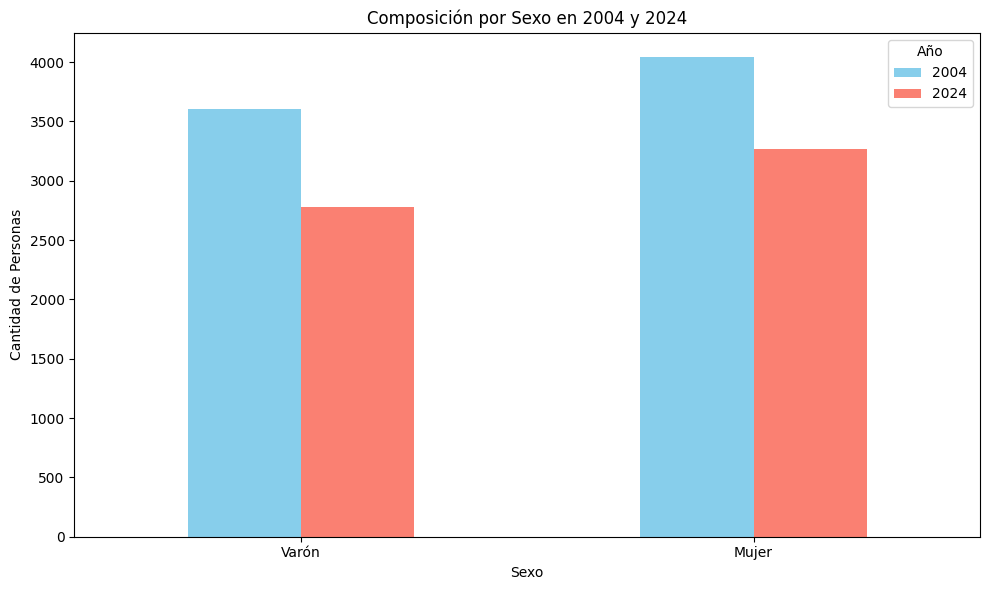

In [217]:
# Filtramos los datos
datos_2004 = eph_combined[eph_combined['ANO4'] == 2004]
datos_2024 = eph_combined[eph_combined['ANO4'] == 2024]

# Verificamos cuántos registros hay después del filtrado
print(f"Registros 2004: {len(datos_2004)}")
print(f"Registros 2024: {len(datos_2024)}")

# Contamos la cantidad de personas por sexo en cada año
composicion_2004 = datos_2004['CH04'].value_counts()
composicion_2024 = datos_2024['CH04'].value_counts()

# Imprimimos los conteos para verificar si hay datos
print("Composición 2004:\n", composicion_2004)
print("Composición 2024:\n", composicion_2024)

# Reindexamos ambos conteos con los valores 1 y 2
composicion_2004 = composicion_2004.reindex([1, 2], fill_value=0)
composicion_2024 = composicion_2024.reindex([1, 2], fill_value=0)

# Creamos un DataFrame para graficar
df_composicion = pd.DataFrame({'2004': composicion_2004,'2024': composicion_2024})

# Verificamos el DataFrame
print("DataFrame de composición:\n", df_composicion)

# Creamos el gráfico de barras
df_composicion.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Composición por Sexo en 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['Varón', 'Mujer'], rotation=0) 
plt.legend(title='Año')
plt.tight_layout() 
plt.show()

2 D) Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para

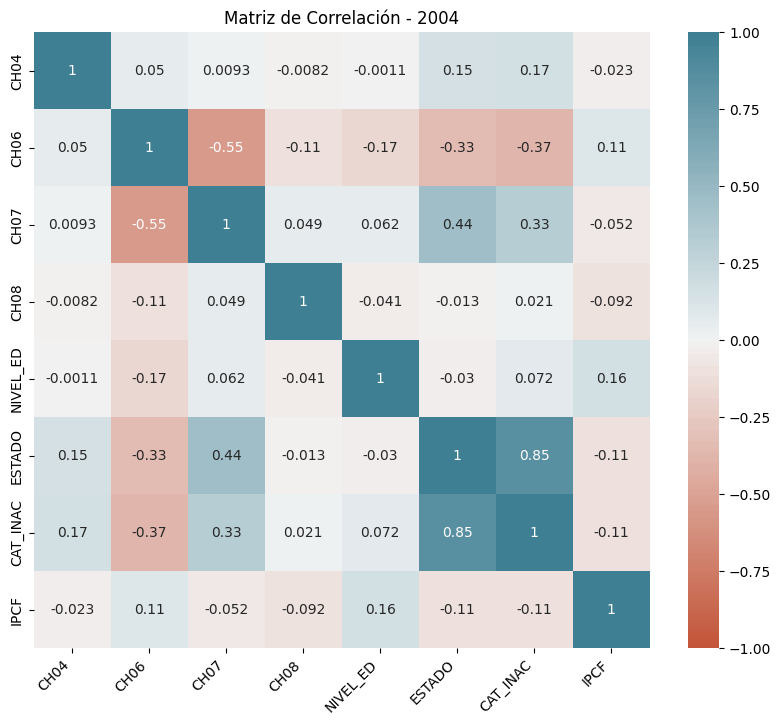

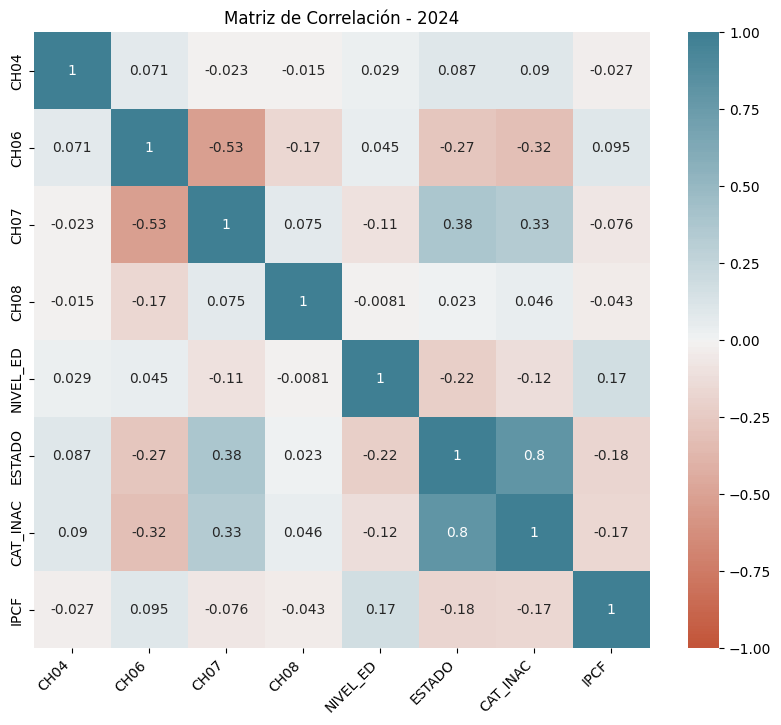

In [218]:
# Filtramos los datos para 2004 y 2024
datos_2004 = eph_combined[eph_combined['ANO4'] == 2004][['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
datos_2024 = eph_combined[eph_combined['ANO4'] == 2024][['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Eliminamos filas con NaN
datos_2004.dropna(inplace=True)
datos_2024.dropna(inplace=True)

import seaborn as sns

# Creamos matrices de correlación para los años 2004 y 2024
corr_2004 = datos_2004.corr()
corr_2024 = datos_2024.corr()

# Configuramos el gráfico para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_2004, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)  # Esto es para mostrar los valores de correlación en la matriz
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title('Matriz de Correlación - 2004')
plt.show()

# Configuramos el gráfico para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_2024, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True,annot=True) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Matriz de Correlación - 2024')
plt.show()

2 E) ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [219]:
# Contamos la cantidad de desocupados
desocupados = eph_combined[(eph_combined['ESTADO'] == 2)]
cantidad_desocupados = desocupados.shape[0]

# Contamos la cantidad de inactivos
inactivos = eph_combined[(eph_combined['ESTADO'] == 3)]
cantidad_inactivos = inactivos.shape[0]

print(f"Cantidad de desocupados: {cantidad_desocupados}")
print(f"Cantidad de inactivos: {cantidad_inactivos}")

# Calculamos la media de IPCF según cada estado
media_ipcf_por_estado = eph_combined.groupby('ESTADO')['IPCF'].mean()

print("Media de IPCF según estado:")
print(media_ipcf_por_estado)


Cantidad de desocupados: 839
Cantidad de inactivos: 5462
Media de IPCF según estado:
ESTADO
0        10.300654
1    125240.392119
2     31655.957950
3     63863.080627
4     40220.538438
Name: IPCF, dtype: float64


PUNTO 3: 

¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [220]:
# Contamos la cantidad de personas que no respondieron la condición de actividad
no_respondieron = eph_combined[(eph_combined['ESTADO'] == 0)]
cantidad_no_respondieron = no_respondieron.shape[0]
print(f"Cantidad de personas que no respondieron su condición de actividad: {cantidad_no_respondieron}")

# Creamos una base con las observaciones que respondieron la condición de actividad 
respondieron = eph_combined[eph_combined['ESTADO'].isin([1, 2, 3, 4])]

# Creamos una base con las observaciones que no respondieron la condición de actividad
norespondieron = eph_combined[eph_combined['ESTADO'] == 0]


Cantidad de personas que no respondieron su condición de actividad: 51


In [221]:
# Imprimimos cada DataFrame para verificarlo 
print("Observaciones en la base 'respondieron':")
respondieron

Observaciones en la base 'respondieron':


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,10.0,NaN,10,2575.0,NaN,NaN,NaN,NaN
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [222]:
print("\nObservaciones en la base 'norespondieron':")
norespondieron


Observaciones en la base 'norespondieron':


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
14,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,2,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
15,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,3,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
16,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,4,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
24,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,1,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
25,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,2,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
26,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,3,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
975,TQRMNOQYQHMMRNCDEIJAH00802156,2024,1,1.0,1,2,1,S,33,1794.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2014,TQRMNOSPUHMMOQCDEIJAH00802618,2024,1,1.0,3,2,1,S,33,2159.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2119,TQRMNOPWSHMKTUCDEIJAH00802498,2024,1,1.0,1,2,1,S,33,3707.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2486,TQRMNOPWUHKMKPCDEIJAH00858487,2024,1,1.0,2,2,1,S,33,3046.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN


PUNTO 4: 

Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

     2004  2024
PEA            
0    4030  3424
1    3607  2589


C:\Users\flori\AppData\Local\Temp\ipykernel_720\46829560.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron.loc[:,'PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros
C:\Users\flori\AppData\Local\Temp\ipykernel_720\46829560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:,'PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros


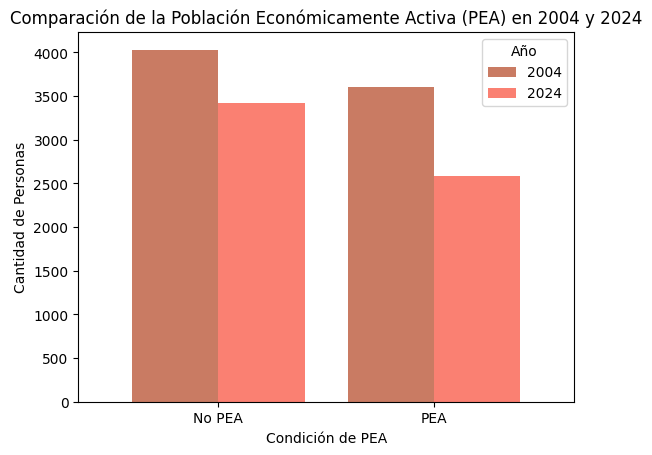

In [223]:
import numpy as np

# Agregamos la columna PEA
respondieron.loc[:,'PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros

# Filtramos los datos para los años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Contamos la cantidad de Población Económicamente Activa y no activa para ambos años
composicion_2004 = respondieron_2004['PEA'].value_counts()
composicion_2024 = respondieron_2024['PEA'].value_counts()

# Creamos un DataFrame para visualizarlos mejor
composicion_df = pd.DataFrame({'2004': composicion_2004, '2024': composicion_2024}).fillna(0)
print(composicion_df)

# Graficamos la composición por PEA para 2004 y 2024
composicion_df.plot(kind='bar', width=0.8,  color=['#c97b63', 'salmon'])
plt.title('Comparación de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('Condición de PEA')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['No PEA', 'PEA'], rotation=0)
plt.legend(title='Año', loc='upper right')
plt.show()

PUNTO 5: 

Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

     2004  2024
PET            
1    4893  3783
0    2744  2230


C:\Users\flori\AppData\Local\Temp\ipykernel_720\694104713.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron.loc[:, 'PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\flori\AppData\Local\Temp\ipykernel_720\694104713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


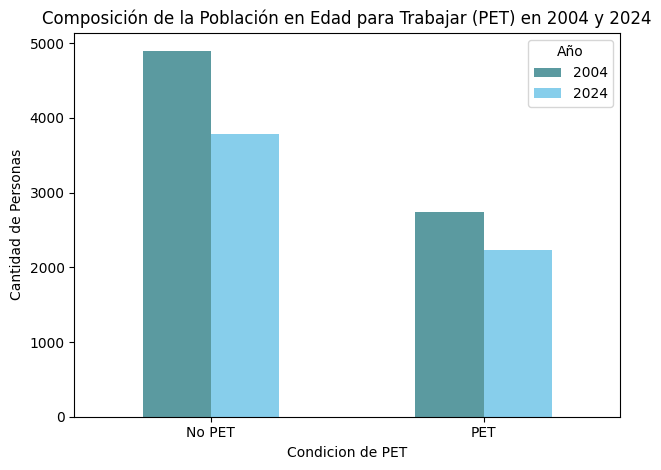

In [224]:
# Creamos la columna PET en respondieron que vale 1 si la edad esta entre 15 y 65
respondieron.loc[:, 'PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

#Vuelvo a filtrar por año, ahora con esta nueva columna
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

#Contamos la cantidad de personas en PEA y no PEA para cada año
pet_2004 = respondieron_2004['PET'].value_counts()
pet_2024 = respondieron_2024['PET'].value_counts()

# Creamos un DataFrame para mejorar la visualización
df_pet = pd.DataFrame({'2004': pet_2004,'2024': pet_2024}) # Rellenar valores NaN con 0 si falta alguna categoría

# Verificamos la estructura del DataFrame
print(df_pet)

# Graficamos la composición por PEA para 2004 y 2024
df_pet.plot(kind='bar', color=['#5b9aa0', 'skyblue'])
plt.title('Composición de la Población en Edad para Trabajar (PET) en 2004 y 2024')
plt.xlabel('Condicion de PET')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['No PET', 'PET'], rotation=0)
plt.legend(title='Año', loc = 'upper right')
plt.tight_layout()
plt.show()

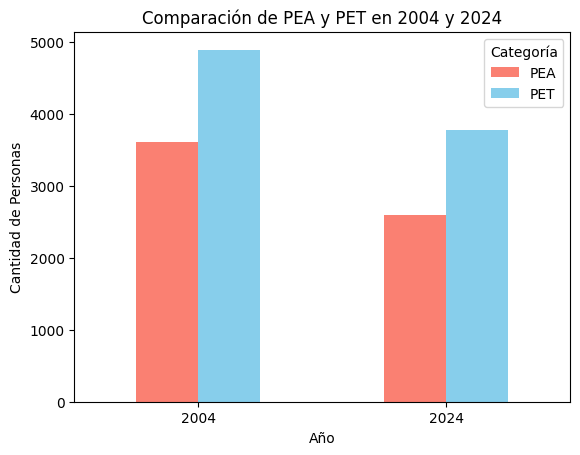

In [225]:
#GRAFICO COMPARACIÓN
# Creamos tablas de resumen para PEA y PET en cada año
pea_pet_2004 = respondieron_2004[['PEA', 'PET']].sum()
pea_pet_2024 = respondieron_2024[['PEA', 'PET']].sum()

# Combinamos los datos en un DataFrame con años en columnas y PEA/PET como índice
pea_pet_summary = pd.DataFrame({'2004': pea_pet_2004, '2024': pea_pet_2024})

# Transponemos para tener los años en el eje X y reorganizamos el gráfico
pea_pet_summary = pea_pet_summary.T

# Realizamos el gráfico de barras
pea_pet_summary.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Comparación de PEA y PET en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=0)
plt.legend(title='Categoría')
plt.show()

PUNTO 6:

Agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [226]:
# Agregamos a la base respondieron la columna "desocupado"
respondieron.loc[:, 'DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
print(respondieron['DESOCUPADO'].sum())

839


C:\Users\flori\AppData\Local\Temp\ipykernel_720\2533426053.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron.loc[:, 'DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\flori\AppData\Local\Temp\ipykernel_720\2533426053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


In [227]:
# Volemos a filtrar por año para que incluya esta columna
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

In [228]:
# Personas desocupadas en 2004
desocupados_2004 = respondieron_2004['DESOCUPADO'].sum()
print("Personas desocupadas en 2004:", desocupados_2004)

Personas desocupadas en 2004: 528


In [229]:
desocupados_2024 = respondieron_2024['DESOCUPADO'].sum()
print("Personas desocupadas en 2024:", desocupados_2024)

Personas desocupadas en 2024: 311


OPCIONAL 

6 A) Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo?

In [230]:
# Calculamos el total de personas por nivel educativo
total_personas_2004 = respondieron_2004.groupby('NIVEL_ED').size().reset_index(name='total_personas')
total_personas_2024 = respondieron_2024.groupby('NIVEL_ED').size().reset_index(name='total_personas')

# Calculamos el total de desocupados por nivel educativo
total_desocupados_2004 = respondieron_2004[respondieron_2004['DESOCUPADO'] == 1].groupby('NIVEL_ED').size().reset_index(name='total_desocupados')
total_desocupados_2024 = respondieron_2024[respondieron_2024['DESOCUPADO'] == 1].groupby('NIVEL_ED').size().reset_index(name='total_desocupados')

# Unimos ambos conjuntos de datos
comparacion_desocupados_2004 = pd.merge(total_personas_2004, total_desocupados_2004, on='NIVEL_ED', how='left').fillna(0)
comparacion_desocupados_2024 = pd.merge(total_personas_2024, total_desocupados_2024, on='NIVEL_ED', how='left').fillna(0)

# Agregamos el año a los DataFrames
comparacion_desocupados_2004['ANO4'] = 2004
comparacion_desocupados_2024['ANO4'] = 2024

# Unimos los datos para comparación
comparacion_desocupados = pd.concat([comparacion_desocupados_2004, comparacion_desocupados_2024])

# Calculamos la proporción de desocupados
comparacion_desocupados['proporcion_desocupados'] = comparacion_desocupados['total_desocupados'] / comparacion_desocupados['total_personas']

# Mostramos el DataFrame resultante
print(comparacion_desocupados[['ANO4', 'NIVEL_ED', 'total_personas', 'total_desocupados', 'proporcion_desocupados']])



   ANO4  NIVEL_ED  total_personas  total_desocupados  proporcion_desocupados
0  2004         1            1405               43.0                0.030605
1  2004         2            1625              107.0                0.065846
2  2004         3            1372              107.0                0.077988
3  2004         4            1083              137.0                0.126500
4  2004         5             700               95.0                0.135714
5  2004         6             647               36.0                0.055641
6  2004         7             805                3.0                0.003727
0  2024         1             847                2.0                0.002361
1  2024         2             651               35.0                0.053763
2  2024         3            1275               55.0                0.043137
3  2024         4            1274              130.0                0.102041
4  2024         5             752               61.0                0.081117

6 B) Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

Para poder hacer este punto primero tenemos que ver qué hacemos con los NaN que tiene la variable CH06

In [231]:
# Cotamos cuántos NaN hay en la columna CH06
nan_count = respondieron['CH06'].isna().sum()
print(f"Cantidad de NaN en la columna CH06: {nan_count}")


Cantidad de NaN en la columna CH06: 135


In [232]:
# Hacemos que la columna 'CH06' sea numérica
respondieron.loc[:, 'CH06'] = pd.to_numeric(respondieron['CH06'], errors='coerce')

# Calculamos la mediana de la edad por nivel educativo
mediana_edad_por_nivel = respondieron.groupby('NIVEL_ED')['CH06'].median()

# Definimos una función para rellenar NaN basándose en el nivel educativo
def rellenar_nan_edad(row):
    if pd.isna(row['CH06']): # Si 'CH06' es NaN, devolver la mediana correspondiente del nivel educativo
        return mediana_edad_por_nivel.get(row['NIVEL_ED'], row['CH06'])
    return row['CH06']

# Aplicamps la función para rellenar los NaN en 'CH06'
respondieron.loc[:, 'CH06'] = respondieron.apply(rellenar_nan_edad, axis=1)

# Verificamos que ya no quede ningún NaN
nan_count_after = respondieron['CH06'].isna().sum()
print(f"Cantidad de NaN en la columna CH06 después del relleno: {nan_count_after}")



Cantidad de NaN en la columna CH06 después del relleno: 0


Ahora resolvemos la consigna

In [233]:
# Creamos la columna de edad agrupada en intervalos de 10 años
bins = range(0, 101, 10)  # Edades de 0 a 100 en intervalos de 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Etiquetas para cada grupo
respondieron['EDAD_GRUPO'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False)

# Ahora convertimos a categórico si es necesario
respondieron['EDAD_GRUPO'] = respondieron['EDAD_GRUPO'].astype('category')

# Filtramos para los años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Calculamos el total de personas y desocupados por grupo de edad para ambos años
total_por_edad_2004 = respondieron_2004.groupby('EDAD_GRUPO').size()
desocupados_por_edad_2004 = respondieron_2004[respondieron_2004['DESOCUPADO'] == 1].groupby('EDAD_GRUPO').size()

total_por_edad_2024 = respondieron_2024.groupby('EDAD_GRUPO').size()
desocupados_por_edad_2024 = respondieron_2024[respondieron_2024['DESOCUPADO'] == 1].groupby('EDAD_GRUPO').size()

# Creamos un DataFrame para las proporciones
proporciones_2004 = (desocupados_por_edad_2004 / total_por_edad_2004).fillna(0)  # Evita NaN en proporciones
proporciones_2024 = (desocupados_por_edad_2024 / total_por_edad_2024).fillna(0)  # Evita NaN en proporciones

# Combinamos las proporciones en un solo DataFrame para facilitar la comparación
proporciones_comparacion = pd.DataFrame({'Proporción 2004': proporciones_2004,'Proporción 2024': proporciones_2024}).fillna(0)

# Mostramos los resultados
print(proporciones_comparacion)

# Respuesta a la pregunta sobre cambios
if (proporciones_comparacion['Proporción 2004'] != proporciones_comparacion['Proporción 2024']).any():
    print("Si hubo cambios en la proporción de desocupados por edad entre 2004 y 2024.")
else:
    print("No hubo cambios en la proporción de desocupados por edad entre 2004 y 2024.")


            Proporción 2004  Proporción 2024
EDAD_GRUPO                                  
0-9                0.000000         0.000000
10-19              0.069625         0.034318
20-29              0.152979         0.136038
30-39              0.087133         0.060649
40-49              0.058954         0.084034
50-59              0.088117         0.051724
60-69              0.057692         0.036458
70-79              0.017937         0.008299
80-89              0.005291         0.000000
90-99              0.000000         0.000000
Si hubo cambios en la proporción de desocupados por edad entre 2004 y 2024.


C:\Users\flori\AppData\Local\Temp\ipykernel_720\1975261870.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['EDAD_GRUPO'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False)
C:\Users\flori\AppData\Local\Temp\ipykernel_720\1975261870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['EDAD_GRUPO'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False)
C:\Users\flori\AppData\Local\Temp\ipykernel_720\1975261870.py:7: SettingWithCopyWarning: 
A value is trying

Opcional 7

In [234]:
# Filtramos para obtener solo los registros de Tucumán (aglomerado 29)
tucuman_04 = eph_04[eph_04['AGLOMERADO'] == 29].copy()
tucuman_24 = eph_24[eph_24['AGLOMERADO'] == 29].copy()

# Combinamos ambos DataFrames
tucuman_combined = pd.concat([tucuman_04, tucuman_24], ignore_index=True)

# Mostramos el DataFrame combinado
print(tucuman_combined.head())

                          CODUSU    ANO4 TRIMESTRE  NRO_HOGAR COMPONENTE H15  \
0  TQRMNOQXRHKOMLCDEHPJB00856884  2024.0         1        1.0          1   1   
1  TQRMNOQXRHKOMLCDEHPJB00856884  2024.0         1        1.0          2   1   
2  TQRMNOQXRHKOMLCDEHPJB00856884  2024.0         1        1.0          3   1   
3  TQRMNOQXRHKOMLCDEHPJB00856884  2024.0         1        1.0          4   1   
4  TQRMNOQXRHKOMLCDEHPJB00856884  2024.0         1        1.0          5   0   

  REGION MAS_500 AGLOMERADO  PONDERA  ... IDECCFR RDECCFR GDECCFR PDECCFR  \
0     40       S         29    556.0  ...     3.0       4     3.0     NaN   
1     40       S         29    556.0  ...     3.0       4     3.0     NaN   
2     40       S         29    556.0  ...     3.0       4     3.0     NaN   
3     40       S         29    556.0  ...     3.0       4     3.0     NaN   
4     40       S         29    556.0  ...     3.0       4     3.0     NaN   

  ADECCFR PONDIH PJ1_1 PJ2_1 PJ3_1 IDIMPP  
0       4  6

C:\Users\flori\AppData\Local\Temp\ipykernel_720\530160058.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tucuman_combined = pd.concat([tucuman_04, tucuman_24], ignore_index=True)


In [235]:
#Codificamos de igual manera para ambos años la variable que usamos después 
tucuman_combined['ESTADO'] = tucuman_combined['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 


C:\Users\flori\AppData\Local\Temp\ipykernel_720\2637957007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tucuman_combined['ESTADO'] = tucuman_combined['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4})


# PARTE 2: Clasificación

PUNTO 1: 

Partan la base respondieron en una base de prueba (test) y una de entrenamiento (train)

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Queda como varible dependiente "DESOCUPADO" y el resto de variables con impacto en dicha varible serán las dependientes 
# Para 2004
y_2004 = respondieron_2004['DESOCUPADO']
# todas las columnas menos desocupado
X_2004 = respondieron_2004[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Partición
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)

# Columna de unos
X_train_2004 = pd.concat([pd.Series(1, index=X_train_2004.index, name="Intercepto"), X_train_2004], axis=1)
X_test_2004 = pd.concat([pd.Series(1, index=X_test_2004.index, name="Intercepto"), X_test_2004], axis=1)

# Para 2024
y_2024 = respondieron_2024['DESOCUPADO']
X_2024 = respondieron_2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Partición
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)
# Columna de unos
X_train_2024 = pd.concat([pd.Series(1, index=X_train_2024.index, name="Intercepto"), X_train_2024], axis=1)
X_test_2024 = pd.concat([pd.Series(1, index=X_test_2024.index, name="Intercepto"), X_test_2024], axis=1)

PUNTO 2: 

Implementen los siguientes métodos reportando luego la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy de:

Regresión logística

Matriz de Confusión para 2004:
 [[2133    0]
 [   0  159]]
Accuracy para 2004: 1.00
AUC para 2004: 1.00


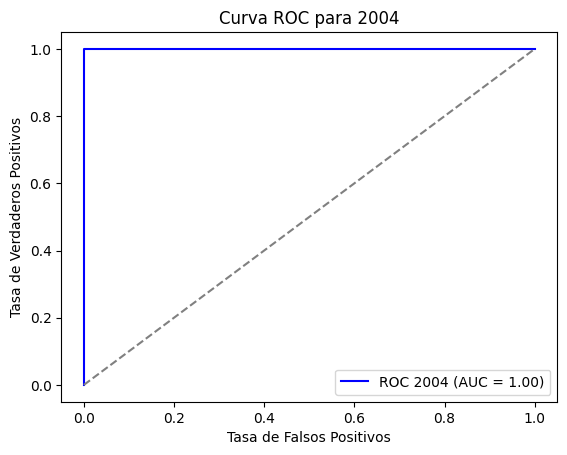

Matriz de Confusión para 2024:
 [[1717    1]
 [   5   81]]
Accuracy para 2024: 1.00
AUC para 2024: 1.00


C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


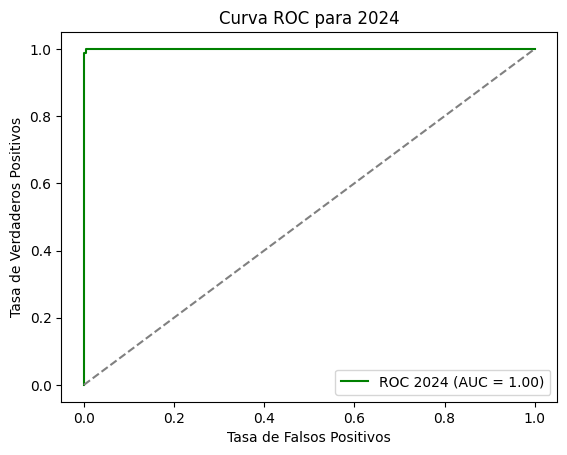

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Inicializamos el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=101)

# Ajustamos el modelo para 2004
logreg.fit(X_train_2004, y_train_2004)

# Predecimos y calculamos las métricas para el conjunto de prueba de 2004
y_pred_2004 = logreg.predict(X_test_2004)
y_pred_proba_2004 = logreg.predict_proba(X_test_2004)[:, 1]

# Matriz de Confusión
conf_matrix_2004 = confusion_matrix(y_test_2004, y_pred_2004)
print("Matriz de Confusión para 2004:\n", conf_matrix_2004)

# Curva ROC y AUC para 2004
fpr_2004, tpr_2004, _ = roc_curve(y_test_2004, y_pred_proba_2004)
roc_auc_2004 = auc(fpr_2004, tpr_2004)

# Accuracy para 2004
accuracy_2004 = accuracy_score(y_test_2004, y_pred_2004)
print(f"Accuracy para 2004: {accuracy_2004:.2f}")
print(f"AUC para 2004: {roc_auc_2004:.2f}")

# Graficamos la curva ROC para 2004
plt.figure()
plt.plot(fpr_2004, tpr_2004, color='blue', label=f'ROC 2004 (AUC = {roc_auc_2004:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para 2004')
plt.legend(loc="lower right")
plt.show()

# Repetimos lo mismo para 2024
logreg.fit(X_train_2024, y_train_2024)

# Predicciones para 2024
y_pred_2024 = logreg.predict(X_test_2024)
y_pred_proba_2024 = logreg.predict_proba(X_test_2024)[:, 1]

# Matriz de Confusión
conf_matrix_2024 = confusion_matrix(y_test_2024, y_pred_2024)
print("Matriz de Confusión para 2024:\n", conf_matrix_2024)

# Curva ROC y AUC para 2024
fpr_2024, tpr_2024, _ = roc_curve(y_test_2024, y_pred_proba_2024)
roc_auc_2024 = auc(fpr_2024, tpr_2024)

# Accuracy para 2024
accuracy_2024 = accuracy_score(y_test_2024, y_pred_2024)
print(f"Accuracy para 2024: {accuracy_2024:.2f}")
print(f"AUC para 2024: {roc_auc_2024:.2f}")

# Graficamos la curva ROC para 2024
plt.figure()
plt.plot(fpr_2024, tpr_2024, color='green', label=f'ROC 2024 (AUC = {roc_auc_2024:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para 2024')
plt.legend(loc="lower right")
plt.show()


Análisis discriminante lineal

Resultados para el año 2004:
Matriz de Confusión:
 [[2125    8]
 [ 144   15]]
Accuracy: 0.9336823734729494
AUC: 0.9748191787042197


<Figure size 640x480 with 0 Axes>

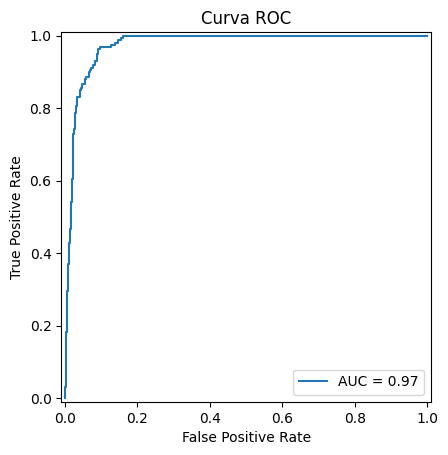


Resultados para el año 2024:
Matriz de Confusión:
 [[1710    8]
 [  86    0]]
Accuracy: 0.9478935698447893
AUC: 0.9701518802284972


<Figure size 640x480 with 0 Axes>

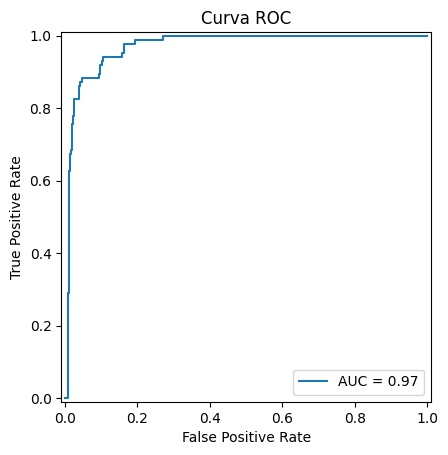

In [238]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

def lda_analysis(X_train, X_test, y_train, y_test):
    # Entrenamos el modelo LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # Predicciones 
    y_pred = lda.predict(X_test)
    y_prob = lda.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:\n", conf_matrix)

    # Calculamos accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    print("AUC:", auc_score)
    
    # Graficamos la curva ROC
    plt.figure()
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot()
    plt.title("Curva ROC")
    plt.show()

# Ejecutamos análisis para 2004
print("Resultados para el año 2004:")
lda_analysis(X_train_2004, X_test_2004, y_train_2004, y_test_2004)

# Ejecutamos análisis para 2024
print("\nResultados para el año 2024:")
lda_analysis(X_train_2024, X_test_2024, y_train_2024, y_test_2024)


KNN k= 3

Resultados para el año 2004 con KNN (k=3):
Matriz de Confusión:
 [[2066   67]
 [ 122   37]]
Accuracy: 0.9175392670157068
AUC: 0.7197660601450109


<Figure size 640x480 with 0 Axes>

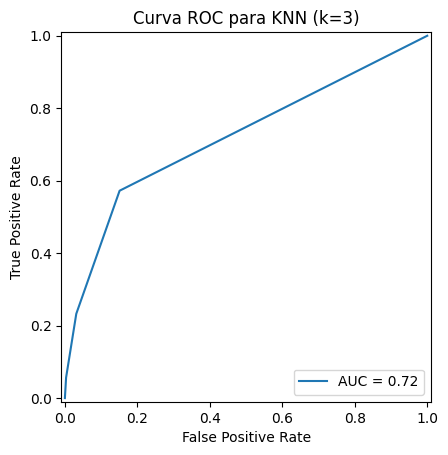


Resultados para el año 2024 con KNN (k=3):
Matriz de Confusión:
 [[1683   35]
 [  68   18]]
Accuracy: 0.9429046563192904
AUC: 0.6507533096894713


<Figure size 640x480 with 0 Axes>

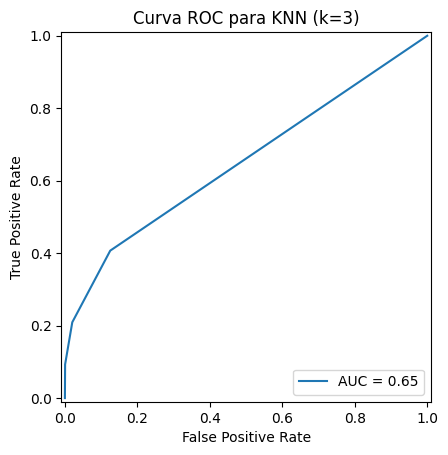

In [239]:
from sklearn.neighbors import KNeighborsClassifier

def knn_analysis(X_train, X_test, y_train, y_test, k=3):
    # Entrenamos modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predicciones
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:\n", conf_matrix)

    # Calculamos accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    print("AUC:", auc_score)
    
    # Graficamos la curva ROC
    plt.figure()
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot()
    plt.title(f"Curva ROC para KNN (k={k})")
    plt.show()

# Ejecutamos análisis para 2004 con KNN
print("Resultados para el año 2004 con KNN (k=3):")
knn_analysis(X_train_2004, X_test_2004, y_train_2004, y_test_2004, k=3)

# Ejecutamos análisis para 2024 con KNN
print("\nResultados para el año 2024 con KNN (k=3):")
knn_analysis(X_train_2024, X_test_2024, y_train_2024, y_test_2024, k=3)

Naive Bayes

Resultados para el año 2004 con Naive Bayes:
Matriz de Confusión:
 [[2133    0]
 [   2  157]]
Accuracy: 0.9991273996509599
AUC: 1.0


<Figure size 640x480 with 0 Axes>

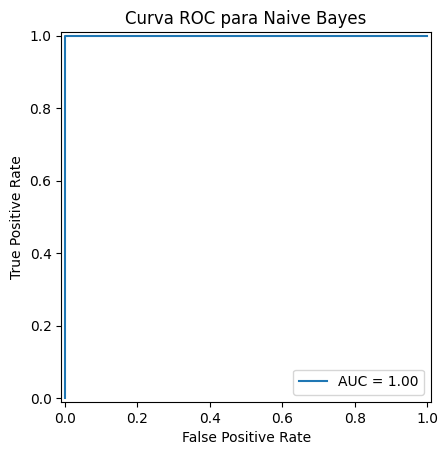


Resultados para el año 2024 con Naive Bayes:
Matriz de Confusión:
 [[1718    0]
 [  86    0]]
Accuracy: 0.9523281596452328
AUC: 0.7180604813601538


<Figure size 640x480 with 0 Axes>

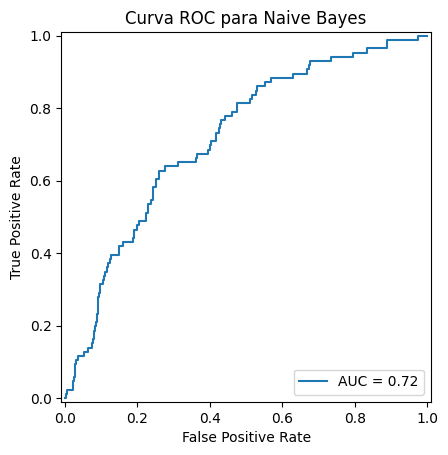

In [240]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes_analysis(X_train, X_test, y_train, y_test):
    # Entrenamos modelo Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # Predicciones
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:\n", conf_matrix)

    # Calculamos accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    print("AUC:", auc_score)
    
    # Graficamos la curva ROC
    plt.figure()
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot()
    plt.title("Curva ROC para Naive Bayes")
    plt.show()

# Ejecutamos análisis para 2004 con Naive Bayes
print("Resultados para el año 2004 con Naive Bayes:")
naive_bayes_analysis(X_train_2004, X_test_2004, y_train_2004, y_test_2004)

# Ejecutamos análisis para 2024 con Naive Bayes
print("\nResultados para el año 2024 con Naive Bayes:")
naive_bayes_analysis(X_train_2024, X_test_2024, y_train_2024, y_test_2024)
